In [1]:
import pandas as pd 
import numpy as np 

In [2]:
#part 1

In [3]:
part1_train = pd.read_table(r"C:\Users\86187\Desktop\CUHKSZ\MAT2040\projects\project2\data\Part1_training_data.txt", names=["price"])
part1_test = pd.read_table(r"C:\Users\86187\Desktop\CUHKSZ\MAT2040\projects\project2\data\Part1_testing_data.txt", names=["price"])
part1_data = pd.concat([part1_train, part1_test])
print(part1_data.head())
print(part1_data.describe())

         price
0  6855.585318
1  7957.034758
2  5036.333172
3  6575.793236
4  9250.628680
             price
count   300.000000
mean   5840.664456
std    1029.776584
min    3411.350575
25%    5114.556628
50%    5851.293665
75%    6441.582334
max    9274.051623


In [4]:
print("Training data")
print(part1_train.head())
print(part1_train.describe())
print("="*78)
print("Testing data")
print(part1_test.head())
print(part1_test.describe())

Training data
         price
0  6855.585318
1  7957.034758
2  5036.333172
3  6575.793236
4  9250.628680
             price
count   200.000000
mean   5591.679934
std     887.662119
min    3451.054975
25%    5035.011724
50%    5658.279165
75%    6161.805364
max    9274.051623
Testing data
         price
0  6140.242914
1  4942.426720
2  4916.509842
3  6412.387005
4  4601.522714
             price
count   100.000000
mean   6338.633498
std    1114.979120
min    3411.350575
25%    5234.349113
50%    6532.408250
75%    7252.532070
max    8652.710184


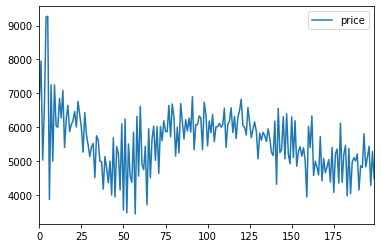

In [5]:
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
part1_train.plot()
plt.show()

In [6]:
# Autoregression Model

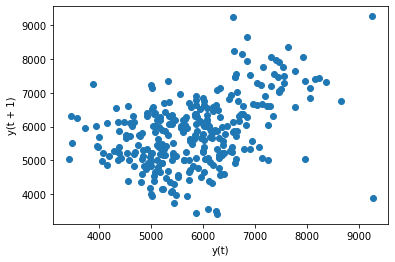

          t-1       t+1
t-1  1.000000  0.159974
t+1  0.159974  1.000000


In [7]:
pd.plotting.lag_plot(part1_data)
plt.show()
values = part1_train
lag1 = pd.concat([values.shift(1), values], axis=1)
lag1.columns = ['t-1', 't+1']
lag1_corr = lag1.corr()
print(lag1_corr)

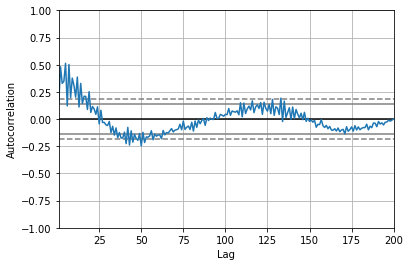

In [8]:
pd.plotting.autocorrelation_plot(values)
plt.show()

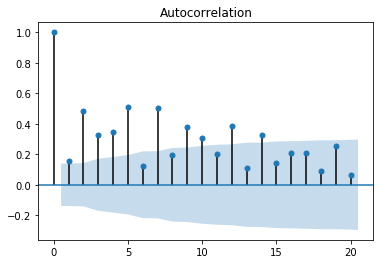

' The ACF graphic seems not random. Thus, there exists a serial correlation in this series'

In [9]:
""" ACF describes the autocorrelation between an observation and another observation at a prior time step that includes direct and indirect dependence information.
This means we would expect the ACF for the AR(k) time series to be strong to a lag of k and the inertia of that relationship would carry on to subsequent lag values, trailing off at some point as the effect was weakened."""
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(values, lags=20)
plt.show()
" The ACF graphic seems not random. Thus, there exists a serial correlation in this series"

In [10]:
lags = values
for i in range(1,20):
    lags = pd.concat([lags, values.shift(i)], axis=1)
column = ["t"]
for i in range(1,20):
    name = "t"+"-"+str(i)
    column.append(name)
lags.columns = column
lags_corr = lags.corr()
print(lags_corr.head())

            t       t-1       t-2       t-3       t-4       t-5       t-6  \
t    1.000000  0.159974  0.494700  0.340624  0.361464  0.560440  0.141617   
t-1  0.159974  1.000000  0.158464  0.489977  0.340851  0.359632  0.558147   
t-2  0.494700  0.158464  1.000000  0.156829  0.489847  0.340264  0.358958   
t-3  0.340624  0.489977  0.156829  1.000000  0.156336  0.488772  0.336176   
t-4  0.361464  0.340851  0.489847  0.156336  1.000000  0.155970  0.489020   

          t-7       t-8       t-9      t-10      t-11      t-12      t-13  \
t    0.587108  0.236878  0.450445  0.377031  0.248909  0.475380  0.141545   
t-1  0.143835  0.584844  0.232469  0.444038  0.375767  0.245408  0.473881   
t-2  0.558744  0.142712  0.584646  0.231412  0.443621  0.375183  0.244719   
t-3  0.362793  0.556207  0.136889  0.578784  0.229188  0.441269  0.373055   
t-4  0.336440  0.362813  0.556622  0.136743  0.578792  0.229004  0.441272   

         t-14      t-15      t-16      t-17      t-18      t-19  
t    0.4

In [11]:
"""The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags."""
from statsmodels.tsa.stattools import pacf
PACF_array = pacf(values, nlags=9)
print("The Partial Auto Correlation Function")
name = ["lag"+str(i) for i in range(1,11)]
PACF_data = pd.DataFrame({
    "lags": name,
    "PACF": PACF_array
})
print(PACF_data)

The Partial Auto Correlation Function
    lags      PACF
0   lag1  1.000000
1   lag2  0.159280
2   lag3  0.472379
3   lag4  0.287595
4   lag5  0.156203
5   lag6  0.392081
6   lag7 -0.158633
7   lag8  0.152445
8   lag9  0.012361
9  lag10  0.035462


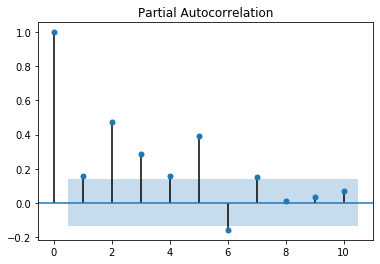

'We choose lag1, lag2, lag3, lag4, lag5, lag6'

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(values, lags=10)
plt.show()
"We choose lag1, lag2, lag3, lag4, lag5, lag6"

In [13]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
Lag_selected = ar_select_order(values,maxlag=10, ic="aic")
print("The lags selected are:")
print(Lag_selected.ar_lags)
print("="*78)
model = AutoReg(part1_train, lags=[1,2,3,4,5,6])
model_fit = model.fit()
print(model_fit.summary())

The lags selected are:
[1 2 3 4 5 6 7]
                            AutoReg Model Results                             
Dep. Variable:                  price   No. Observations:                  200
Model:                     AutoReg(6)   Log Likelihood               -1498.410
Method:               Conditional MLE   S.D. of innovations            547.206
Date:                Tue, 29 Dec 2020   AIC                             12.692
Time:                        14:58:18   BIC                             12.827
Sample:                             6   HQIC                            12.747
                                  200                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1530.6964    384.158      3.985      0.000     777.760    2283.633
price.L1      -0.2667      0.065     -4.079      0.000      -0.395      -0.139
price.L2     

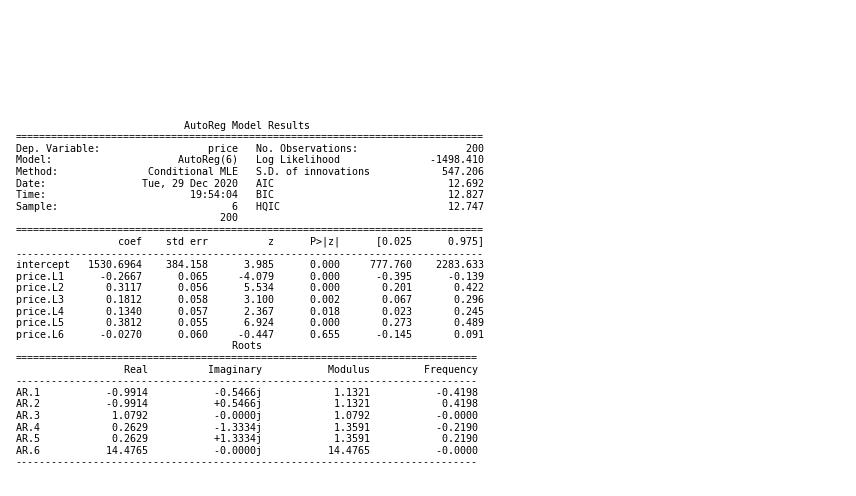

In [50]:
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model_fit.summary()), {'fontsize':12}, fontproperties='monospace')
plt.axis('off')
plt.tight_layout()

In [47]:
predictions = model_fit.predict(start=200, end=299)
for i in range(len(predictions)):
    print("The predicted value is: %f, The true value is: %f" % (predictions.iloc[i], part1_test.iloc[i]))

The predicted value is: 5309.043073, The true value is: 6140.242914
The predicted value is: 4983.622555, The true value is: 4942.426720
The predicted value is: 4866.230989, The true value is: 4916.509842
The predicted value is: 5250.548677, The true value is: 6412.387005
The predicted value is: 4828.916575, The true value is: 4601.522714
The predicted value is: 5331.739797, The true value is: 6101.448394
The predicted value is: 4973.855671, The true value is: 5083.614217
The predicted value is: 5165.161529, The true value is: 6019.416231
The predicted value is: 5186.888155, The true value is: 6641.271118
The predicted value is: 5072.137233, The true value is: 5026.656710
The predicted value is: 5299.286539, The true value is: 7145.518436
The predicted value is: 5082.507135, The true value is: 5055.215411
The predicted value is: 5275.830268, The true value is: 6371.772463
The predicted value is: 5185.606053, The true value is: 5219.661781
The predicted value is: 5216.748527, The true va

In [48]:
from sklearn.metrics import mean_squared_error
from math import sqrt
RMSE = sqrt(mean_squared_error(part1_test, predictions))
print("Test RMSE: %.3f" % RMSE)

Test RMSE: 1481.368


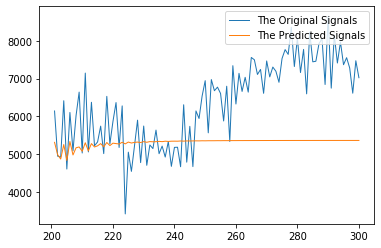

In [49]:
date = np.arange(201, 301)
plt.plot(date, part1_test, linewidth=1, label='The Original Signals')
plt.plot(date, predictions, linewidth=1, label='The Predicted Signals')
plt.legend(loc='upper right')
plt.show()

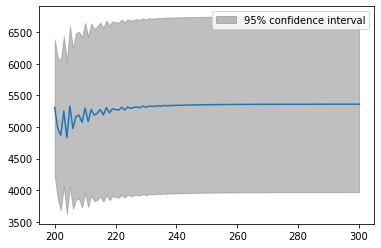

In [17]:
fig = model_fit.plot_predict(200, 300)
plt.show()

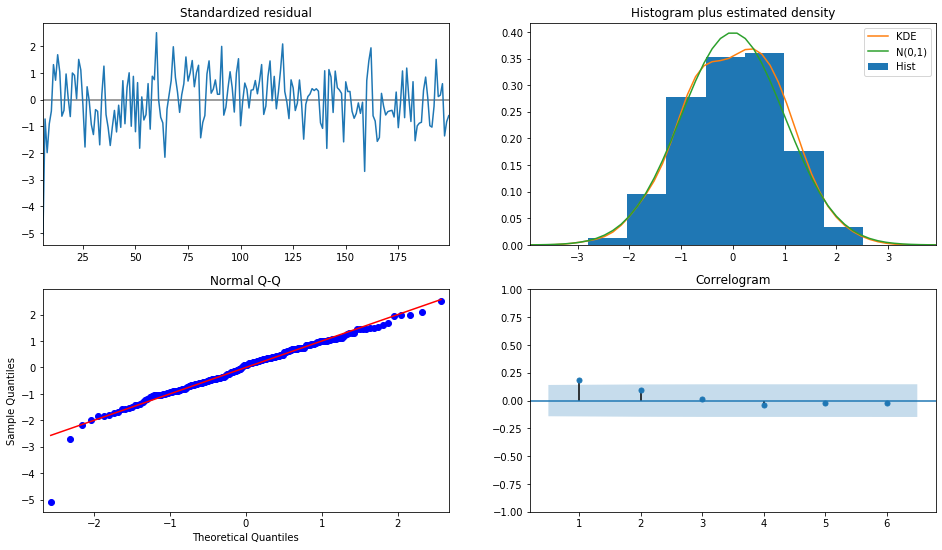

The first graph indicates that the residuals are not correlated with regressors
The Second and third graph indicate that the dependent variable and regressors have finite fourth moments, and it meets the normality(residuals are normally distributed) as well as homoskedasticity assumptions in regression
The fourth graph indicates that there are no new auto correlated regressors should be taken into consideration(The chosen regressors are comprehensive enough


In [18]:
fig = plt.figure(figsize=(16, 9))
fig = model_fit.plot_diagnostics(fig=fig, lags=[1,2,3,4,5,6])
plt.show()
print("The first graph indicates that the residuals are not correlated with regressors\nThe Second and third graph indicate that the dependent variable and regressors have finite fourth moments, and it meets the normality(residuals are normally distributed) as well as homoskedasticity assumptions in regression\nThe fourth graph indicates that there are no new auto correlated regressors should be taken into consideration(The chosen regressors are comprehensive enough")

In [19]:
# Fourier Series

         price
0  6855.585318
1  7957.034758
2  5036.333172
3  6575.793236
4  9250.628680
             price
count   200.000000
mean   5591.679934
std     887.662119
min    3451.054975
25%    5035.011724
50%    5658.279165
75%    6161.805364
max    9274.051623


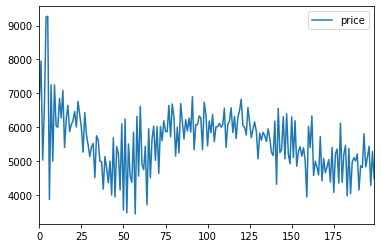

In [20]:
from scipy import pi 
from scipy.fftpack import fft, fftfreq, ifft
values = part1_train
print(values.head())
print(values.describe())
values.plot()
plt.show()

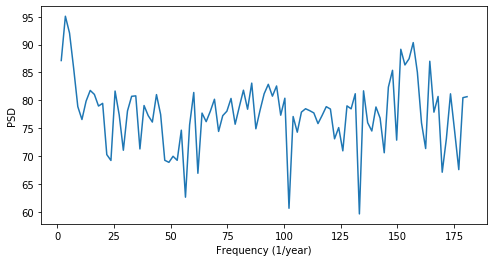

The first few Fourier Coefficients are: 
[1118335.98687567    +0.j          -22752.28783461  -113.44252342j
   46058.09909923-33237.99808286j   13009.50384759-37988.165855j
   -4354.18593348-18857.20670224j    5251.47756782 -7045.53028751j
   -4275.62360805 -5201.49885916j    5890.06760783 -7876.95742182j
   10462.91044866 -6418.83296383j    1609.39307757-11194.43616001j]


In [21]:
# Suppose the data is measured in the unit of days
part1_train_ftf = fft(values["price"])
part1_train_psd = np.abs(part1_train_ftf) ** 2 # Get the power spectral density
part1_train_fftfreq = fftfreq(len(part1_train_psd), 1./365)
selected = part1_train_fftfreq > 0 #Because the target is price, we only focus on the positive frequencies
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(part1_train_fftfreq[selected], 10*np.log10(part1_train_psd[selected]))
ax.set_xlabel("Frequency (1/year)")
ax.set_ylabel("PSD")
plt.show()
print("The first few Fourier Coefficients are: ")
print(part1_train_ftf[:10])

In [22]:
print(part1_train_fftfreq[selected].argmax())
"We observe a peak for f = 98"

98


'We observe a peak for f = 98'

In [23]:
# cut out frequencies higher than the fundemental frequency
part1_train_bis = part1_train_ftf.copy()
part1_train_bis[np.abs(part1_train_fftfreq) > 98.1] = 0

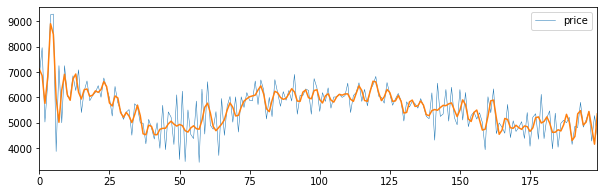

In [24]:
part1_train_slow = np.real(ifft(part1_train_bis))
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
values.plot(ax=ax, lw=.5)
ax.plot_date(range(200), part1_train_slow,"-", xdate=False)
# There exists some seasonally changes

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
date = pd.DataFrame({"date":[i for i in range(200)]})
model.fit(date, values)
pred_linreg = model.predict(values)
residuals = values - pred_linreg
pred_linreg = pred_linreg.flatten()
data = pd.DataFrame({
    "pred_linreg": pred_linreg,
    "residuals": residuals["price"]
})
print(data.head())
print("R-squared: {:.2e}".format(model.score(date, values)))

    pred_linreg     residuals
0 -25505.753164  32361.338482
1 -30575.590010  38532.624769
2 -17131.958396  22168.291569
3 -24217.904487  30793.697723
4 -36529.844368  45780.473049
R-squared: 9.01e-02


In [26]:
fft_output = fft(data['residuals'])
power = np.abs(fft_output)
freq = fftfreq(len(residuals))

print(fft_output[:10])
print(freq[:10])

[5055966.28918931     +0.j         -127478.28158225   -635.60456204j
  258057.8871362 -186228.43160376j   72890.65639394-212843.03973556j
  -24395.97039753-105654.61914496j   29423.38550655 -39475.24312352j
  -23955.79531203 -29143.3609243j    33001.32727342 -44133.62750722j
   58622.4055374  -35963.93478934j    9017.232263   -62721.0544862j ]
[0.    0.005 0.01  0.015 0.02  0.025 0.03  0.035 0.04  0.045]


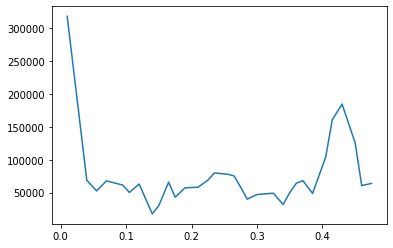

In [27]:
from scipy.signal import find_peaks
peaks = find_peaks(power[freq>=0])[0]
peak_freq = freq[peaks]
peak_power = power[peaks]
plt.plot(peak_freq, peak_power, '-')

In [28]:
output = pd.DataFrame()
output['index'] = peaks
output['freq (1/365)'] = peak_freq
output['amplitude'] = peak_power
output['period (yeas)'] = 1/peak_freq/365
output['fft'] = fft_output[peaks]
output = output.sort_values('amplitude', ascending=False)
output.head()

,index,freq (1/365),amplitude,period (yeas),fft
0,2,0.010,318237.178612,0.273973,258057.887136-186228.431604j
28,86,0.430,184696.606582,0.006371,181340.309169-35050.374509j
27,83,0.415,160859.643804,0.006602,113871.798647-113617.949628j
29,90,0.450,125616.955195,0.006088,98288.763921-78223.642969j
26,81,0.405,104185.727180,0.006765,-71371.003425+75900.234638j


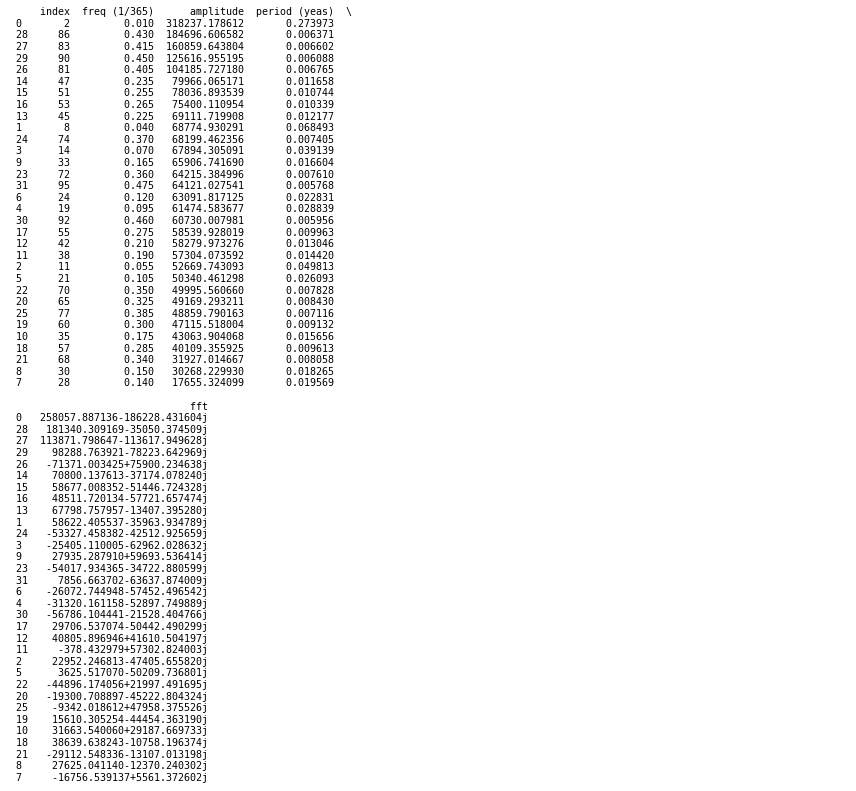

In [51]:
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(output), {'fontsize':12}, fontproperties='monospace')
plt.axis('off')
plt.tight_layout()

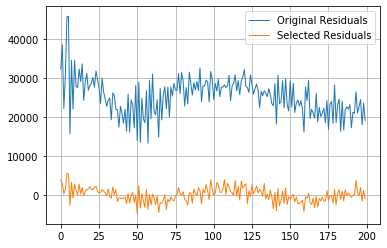

In [29]:
selected_fft_output = [value if value in list(output['fft']) else 0 for value in fft_output]
selected_residuals = ifft(selected_fft_output)

plt.plot(date, residuals, linewidth=1, label='Original Residuals')
plt.plot(date, selected_residuals, linewidth=1, label="Selected Residuals")
plt.legend(loc="upper right")
plt.grid()
plt.show()

In [30]:
from cmath import phase

fourier_terms = pd.DataFrame()
fourier_terms['fft'] = output['fft']
fourier_terms['freq (1/365)'] = output["freq (1/365)"]
fourier_terms['amplitude'] = fourier_terms.fft.apply(lambda x: abs(x))
fourier_terms['phase'] = fourier_terms.fft.apply(lambda x: phase(x))
fourier_terms.sort_values(by=['amplitude'], ascending=False)
fourier_terms['label'] = list(map(lambda x: 'F_{}'.format(x), range(1, fourier_terms.shape[0]+1)))
fourier_terms = fourier_terms.set_index('label')
fourier_terms_dict = fourier_terms.to_dict('index')

fourier_terms.head()

,fft,freq (1/365),amplitude,phase
label,,,,
F_1,258057.887136-186228.431604j,0.010,318237.178612,-0.625111
F_2,181340.309169-35050.374509j,0.430,184696.606582,-0.190931
F_3,113871.798647-113617.949628j,0.415,160859.643804,-0.784282
F_4,98288.763921-78223.642969j,0.450,125616.955195,-0.672209
F_5,-71371.003425+75900.234638j,0.405,104185.727180,2.325450


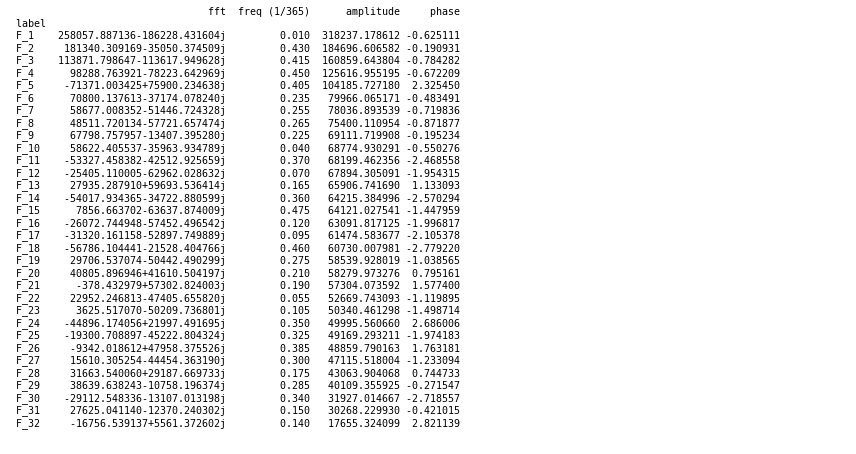

In [52]:
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(fourier_terms), {'fontsize':12}, fontproperties='monospace')
plt.axis('off')
plt.tight_layout()

In [31]:
# Create Fourier Series
import math

res = values
res['time'] = np.arange(0, 200)

for key in fourier_terms_dict.keys():
    a = fourier_terms_dict[key]['amplitude']
    w = 2*math.pi*(fourier_terms_dict[key]['freq (1/365)'])
    p = fourier_terms_dict[key]['phase']
    res[key] = res["time"].apply(lambda t: a*math.cos(w*t + p))

res['F_ALL'] = 0

for column in list(fourier_terms.index):
    res["F_ALL"] = res["F_ALL"] + res[column]

res

,price,time,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,...,F_24,F_25,F_26,F_27,F_28,F_29,F_30,F_31,F_32,F_ALL
0,6855.585318,0,258057.887136,181340.309169,113871.798647,98288.763921,-71371.003425,70800.137613,58677.008352,48511.720134,...,-44896.174056,-19300.708897,-9342.018612,15610.305254,31663.540060,38639.638243,-29112.548336,27625.041140,-16756.539137,7.643025e+05
1,7957.034758,1,269242.048815,-149157.893811,-40178.000853,-69305.734367,16367.310235,43671.979898,49578.249103,52900.130557,...,8592.964380,49056.152173,-24707.891203,37454.762179,-11631.457783,2070.128237,26665.900732,26245.326405,-14966.131268,5.764091e+05
2,5036.333172,2,279363.635132,88583.885649,-44706.010857,33538.576651,44296.834729,-62580.344878,-61791.589228,-58468.404256,...,34794.538584,-25241.345183,46409.344009,-38758.621321,-42224.682723,-39542.807210,535.940087,3228.190465,-2323.003072,4.682881e+04
3,6575.793236,3,288382.700811,-11148.298485,117138.685661,5511.570625,-89641.413247,-55450.641305,-45696.407658,-41895.404743,...,-49496.397660,-26137.490345,-44916.434148,-13500.616845,-26707.751839,15181.864041,-27240.242850,-22450.360911,12004.655496,2.790116e+05
4,9250.628680,4,296263.651719,-68409.321533,-156946.368616,-44022.206966,103984.508365,52143.612226,64662.306932,66353.816009,...,23391.966588,48973.689791,20975.284917,47102.461401,17974.551514,32919.165145,28656.163954,-29620.172569,17627.113875,1.106240e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,5114.319541,195,187879.884941,78232.810739,49879.045784,-78223.642969,-58618.895338,-979.756386,-59992.436193,-73454.233463,...,-21997.491695,45625.013745,-30096.446404,-15610.305254,1750.704698,-39312.288715,21461.782497,12370.240302,-111.124292,-6.112686e+04
196,5443.779426,196,203637.396434,449.750494,34915.246802,104768.003782,69.936444,79512.994073,51766.338299,23856.297333,...,49251.568999,-37045.195685,-2878.241080,-37454.762179,-37543.695476,16340.499597,8457.909469,-15078.082936,13532.558273,3.739701e+05
197,4288.908885,197,218591.244157,-79046.703566,-109985.086395,-121056.942423,58503.209189,15945.423905,56740.396231,68964.081655,...,-35901.200125,-11988.679941,34414.447394,38758.621321,-35839.666840,32183.149618,-30525.731543,-30095.589867,17363.078864,-3.215008e+05
198,5290.831477,198,232682.412103,142597.441096,154422.325606,125495.984086,-96843.672150,-76511.800176,-55330.856131,-36836.484141,...,-7047.177053,47930.689280,-48751.074811,13500.616845,5001.958957,-30381.572749,24255.100325,-20301.404830,8602.727734,2.309787e+05


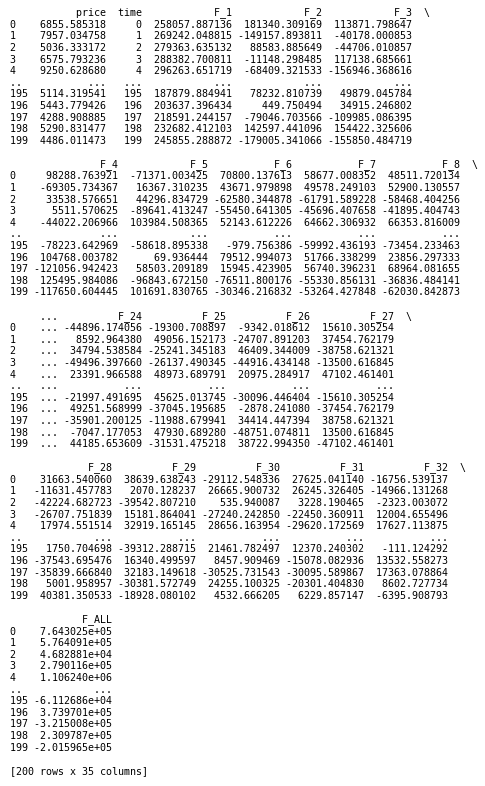

In [61]:
plt.rc('figure', figsize=(5, 2))
plt.text(0.01, 0.05, str(res), {'fontsize':12}, fontproperties='monospace')
plt.axis('off')
plt.tight_layout()

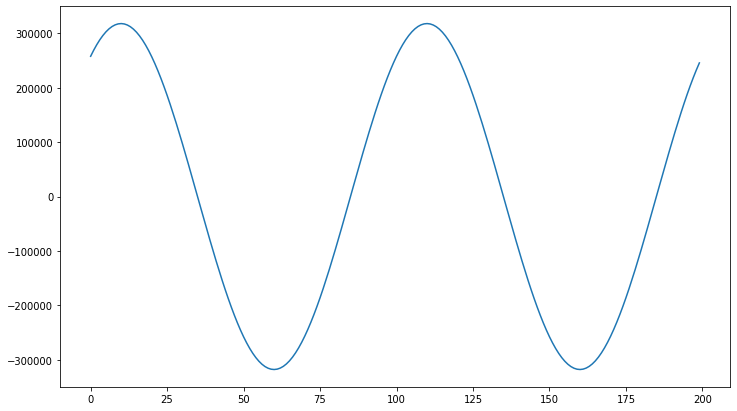

In [54]:
plt.plot(res['time'], res['F_1'])

LinearRegression()


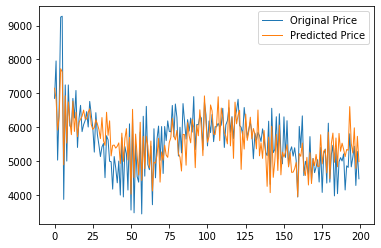

In [33]:
Regressor = pd.DataFrame(res[['time','F_ALL']])
y = pd.DataFrame(res['price'])

model = LinearRegression()
model.fit(Regressor, y)
print(model)
y_pred = model.predict(Regressor)

plt.plot(Regressor['time'], y, linewidth=1, label='Original Price')
plt.plot(Regressor['time'], y_pred, linewidth=1, label='Predicted Price')
plt.legend(loc='upper right')
plt.show()

In [34]:
print("R-squared: {:.2e}".format(model.score(Regressor, y)))

R-squared: 5.94e-01


In [35]:
test_data = pd.DataFrame()
test_data['time'] = np.arange(201, 301)

for key in fourier_terms_dict.keys():
    a = fourier_terms_dict[key]['amplitude']
    w = 2*math.pi*(fourier_terms_dict[key]['freq (1/365)'])
    p = fourier_terms_dict[key]['phase']
    test_data[key] = test_data["time"].apply(lambda t: a*math.cos(w*t + p))

test_data['F_ALL'] = 0

for column in list(fourier_terms.index):
    test_data["F_ALL"] = test_data["F_ALL"] + test_data[column]

test_data

,time,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,...,F_24,F_25,F_26,F_27,F_28,F_29,F_30,F_31,F_32,F_ALL
0,201,269242.048815,-149157.893811,-40178.000853,-69305.734367,16367.310235,43671.979898,49578.249103,52900.130557,23848.390427,...,8592.964380,49056.152173,-24707.891203,37454.762179,-11631.457783,2070.128237,26665.900732,26245.326405,-14966.131268,5.764091e+05
1,202,279363.635132,88583.885649,-44706.010857,33538.576651,44296.834729,-62580.344878,-61791.589228,-58468.404256,-60337.337560,...,34794.538584,-25241.345183,46409.344009,-38758.621321,-42224.682723,-39542.807210,535.940087,3228.190465,-2323.003072,4.682881e+04
2,203,288382.700811,-11148.298485,117138.685661,5511.570625,-89641.413247,-55450.641305,-45696.407658,-41895.404743,-42726.068673,...,-49496.397660,-26137.490345,-44916.434148,-13500.616845,-26707.751839,15181.864041,-27240.242850,-22450.360911,12004.655496,2.790116e+05
3,204,296263.651719,-68409.321533,-156946.368616,-44022.206966,103984.508365,52143.612226,64662.306932,66353.816009,46969.678168,...,23391.966588,48973.689791,20975.284917,47102.461401,17974.551514,32919.165145,28656.163954,-29620.172569,17627.113875,1.106240e+06
4,205,302975.385344,134945.508013,153041.985246,78223.642969,-82365.720542,65264.936099,41634.223369,29406.513329,57421.421628,...,21997.491695,-18329.689459,13448.847339,-15610.305254,43028.303088,-29544.050819,-3469.238126,-12370.240302,10467.235012,1.052526e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,296,203637.396434,449.750494,-34915.246802,104768.003782,-69.936444,-79512.994073,-51766.338299,-23856.297333,-62731.016602,...,49251.568999,37045.195685,2878.241080,-37454.762179,37543.695476,-16340.499597,8457.909469,-15078.082936,13532.558273,2.109889e+05
96,297,218591.244157,-79046.703566,109985.086395,-121056.942423,-58503.209189,-15945.423905,-56740.396231,-68964.081655,18833.915340,...,-35901.200125,11988.679941,-34414.447394,38758.621321,35839.666840,-32183.149618,-30525.731543,-30095.589867,17363.078864,-2.518300e+05
97,298,232682.412103,142597.441096,-154422.325606,125495.984086,96843.672150,76511.800176,55330.856131,36836.484141,68623.563543,...,-7047.177053,-47930.689280,48751.074811,13500.616845,-5001.958957,30381.572749,24255.100325,-20301.404830,8602.727734,7.781303e+05
98,299,245855.288872,-179005.341066,155850.484719,-117650.604445,-101691.830765,30346.216832,53264.427848,62030.842873,2636.265564,...,44185.653609,31531.475218,-38722.994350,-47102.461401,-40381.350533,18928.080102,4532.666205,6229.857147,-6395.908793,3.151706e+05


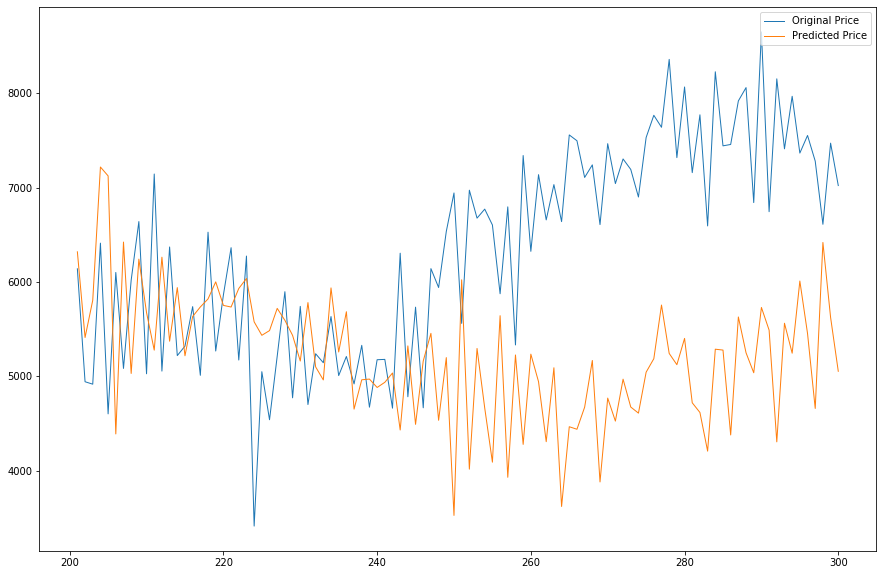

In [36]:
X_test_pred = pd.DataFrame(test_data[['time', 'F_ALL']])
y_test_pred = model.predict(X_test_pred)
plt.figure(figsize=(15,10))
plt.plot(X_test_pred['time'], part1_test, linewidth=1, label='Original Price')
plt.plot(X_test_pred['time'], y_test_pred, linewidth=1, label='Predicted Price')
plt.legend(loc='upper right')
plt.show()

In [37]:
from sklearn.metrics import mean_squared_error
from math import sqrt
RMSE = sqrt(mean_squared_error(part1_test, y_test_pred))
print('The RMSE for Fourier Series Forcasting is %.3f' % RMSE)

The RMSE for Fourier Series Forcasting is 1844.897


In [38]:
# Taylor Expansion

In [39]:
data_poly = pd.DataFrame()
data_poly['time'] = np.arange(0,200)
data_poly['price'] = part1_train["price"]
data_poly.head()

,time,price
0,0,6855.585318
1,1,7957.034758
2,2,5036.333172
3,3,6575.793236
4,4,9250.628680


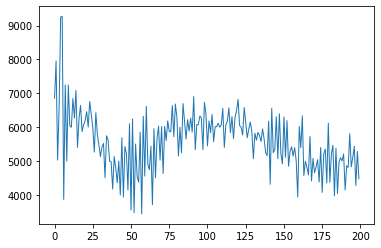

In [40]:
plt.plot(data_poly['time'], data_poly['price'], linewidth=1)
plt.show()

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  train_test_split, KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [42]:
def K_Fold_Val(K, degree, X_poly, Y_poly):
    n = len(X_poly)
    kf = KFold(n_splits=K)
    kf_dict = dict([("fold_%s" % i,[]) for i in range(1, K+1)])
    fold = 0
    for train_index, test_index in kf.split(X_poly):
        fold += 1
        # print("Fold %s" % fold)
        X_train, X_test = X_poly.take(train_index), X_poly.take(test_index)
        Y_train, Y_test = Y_poly[train_index], Y_poly[test_index]
        for d in range(1, degree+1):
            # print("Degree %s" % d)
            poly_features = PolynomialFeatures(
                degree=d, include_bias=False
            )
            linear_reg = LinearRegression()
            model = Pipeline([
                ("polynomial_features", poly_features),
                ("linear_regression", linear_reg)
            ])
            model.fit(X_train, Y_train)
            Y_pred = model.predict(X_test)
            test_mse = mean_squared_error(Y_test, Y_pred)
            kf_dict["fold_%s" % fold].append(test_mse)
        kf_dict["fold_%s" % fold] = np.array(kf_dict["fold_%s" % fold])
    kf_dict["avg"] = np.zeros(degree)
    for i in range(1, fold+1):
        kf_dict["avg"] += kf_dict["fold_%s" % i]
    kf_dict["avg"] /= float(K)
    return kf_dict

kf_dict = K_Fold_Val(len(data_poly["time"]), 50, data_poly[["time"]], data_poly["price"])

In [43]:
kf_dict['avg']

array([729987.10044714, 735789.06533774, 634240.38105162, 531186.45837885,
       534406.35781395, 517187.55361984, 518838.91321028, 517444.61861215,
       581579.40996651, 643996.22428986, 674518.68219609, 679823.62169838,
       676353.86709072, 679924.19043465, 684165.13341387, 688211.64467678,
       691568.49241919, 694044.91555859, 695650.43928423, 696500.01704585,
       696748.43277792, 696548.27821862, 696035.06032425, 695329.76155721,
       694518.21088778, 693689.30380981, 692887.42326621, 692199.11166302,
       691663.43100636, 691293.32922023, 691052.57325061, 691081.74470311,
       694309.88227646, 691026.72477679, 718417.43847833, 696846.12261151,
       708934.15627475, 734387.95658478, 724571.04453193, 721837.67048062,
       726243.70724617, 789352.07590604, 722937.15929711, 717225.43430862,
       717552.67420126, 795375.24821791, 736604.37838177, 737676.79057064,
       768124.0754853 , 840526.53745426])

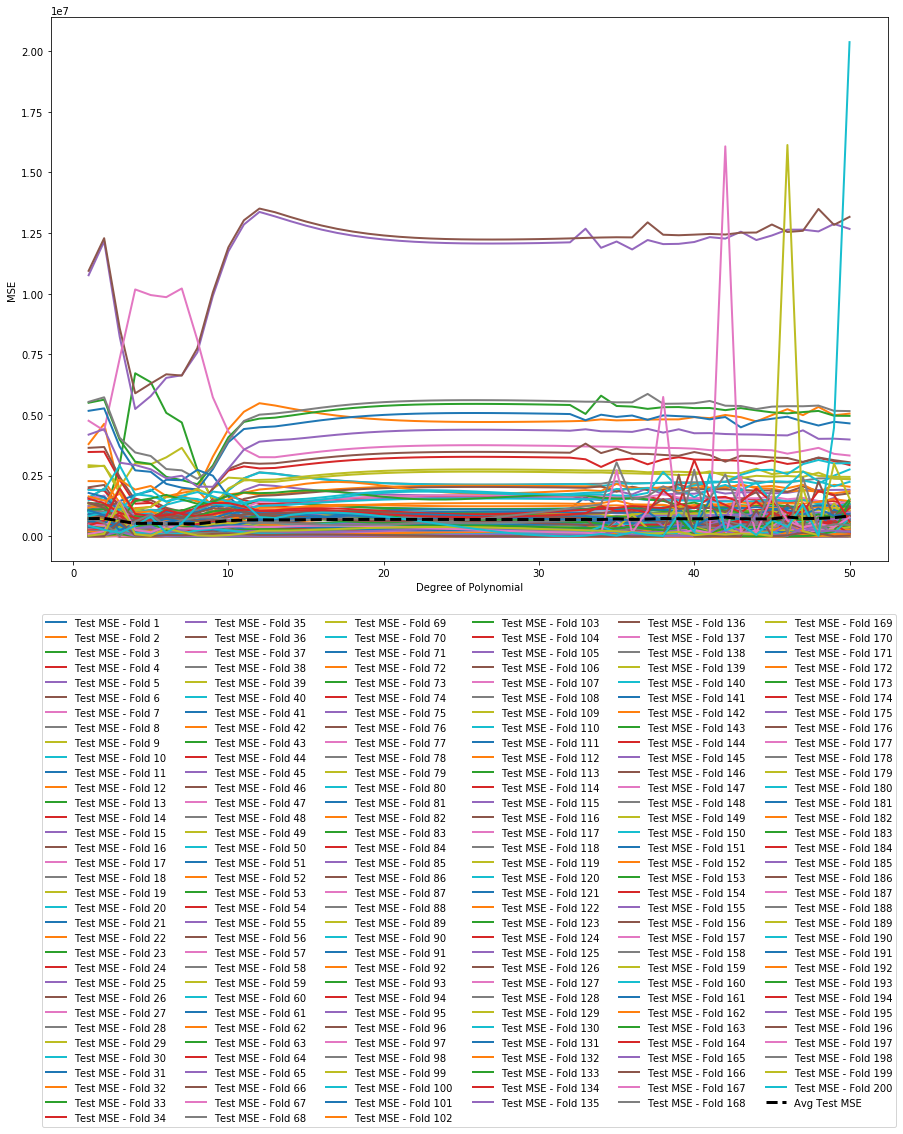

In [44]:
def plot_test_error_curves(kf_dict, K, degree):
    fig, ax = plt.subplots(figsize=(15,10))
    ds = range(1, degree+1)
    for i in range(1, K+1):
        ax.plot(ds, kf_dict["fold_%s" % i], lw=2, label='Test MSE - Fold %s' % i)
    ax.plot(ds, kf_dict['avg'], linestyle='--', color='black', lw=3, label='Avg Test MSE')
    ax.legend(loc="lower center", ncol=6, bbox_to_anchor=(0.5, -1.05))
    ax.set_xlabel("Degree of Polynomial")
    ax.set_ylabel("MSE")
    plt.show()

plot_test_error_curves(kf_dict, len(data_poly["time"]), 50)

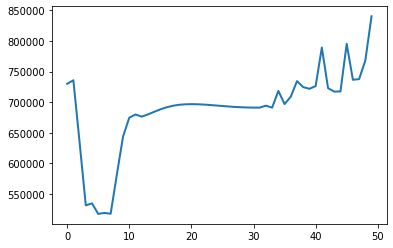

In [45]:
plt.plot(kf_dict["avg"], linewidth=2)
plt.show()

In [46]:
poly_fea = PolynomialFeatures(
    degree=6, include_bias=False
)
poly = LinearRegression()
model_train = Pipeline([
    ("Polynomial_feature", poly_feature),
    ("linear_regression", poly)
])
model_train.fit(data_poly[["time"]], data_poly["price"])
x = model_train.predict(data_poly[["time"]])
sqrt(mean_squared_error(data_poly[["price"]], x))

NameError: name 'poly_feature' is not defined

In [97]:
print("The degree %s gives the minimum MSE" % str(kf_dict['avg'].argmin()+1))

The degree 6 gives the minimum MSE


In [143]:
lin_poly = LinearRegression()
poly_feature = PolynomialFeatures(degree=6, include_bias=False)
model = Pipeline([
    ("polynomial_feature", poly_feature),
    ("linear_regression", lin_poly)
])
model.fit(data_poly[["time"]], data_poly["price"])
test_poly = pd.DataFrame()
test_poly["time"] = np.arange(201, 301)
test_poly["price"] = part1_test["price"]
price_poly_pred = model.predict(test_poly[["time"]])

In [144]:
import math
RMSE_poly = math.sqrt(mean_squared_error(test_poly["price"], price_poly_pred))
print("The RMSE of polynomial regression model is: %.3f" % RMSE_poly)

The RMSE of polynomial regression model is: 94479.060


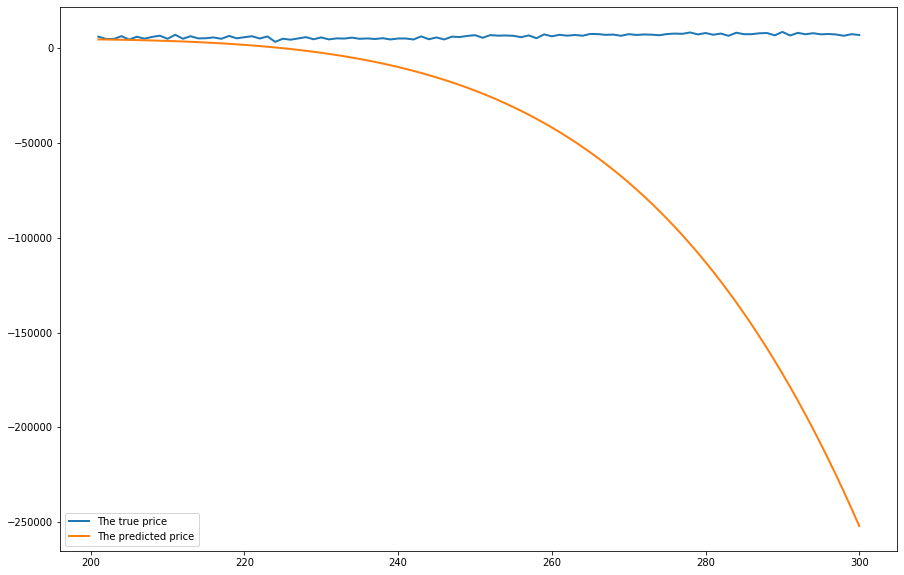

In [145]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(test_poly["time"], test_poly["price"], linewidth=2, label="The true price")
ax.plot(test_poly["time"], price_poly_pred, linewidth=2, label="The predicted price")
plt.legend(loc="best")
plt.show()

In [146]:
model.score(data_poly[["time"]], data_poly["price"])

0.4008258372050043

In [147]:
part1_result = pd.DataFrame()
part1_result["Methods"] = ["Autoregressive Model", "Fourier Series", "Taylor Formula"]
part1_result["RMSE"] = ["1498.986", "1844.897", "29320.724"]
part1_result

,Methods,RMSE
0,Autoregressive Model,1498.986
1,Fourier Series,1844.897
2,Taylor Formula,29320.724


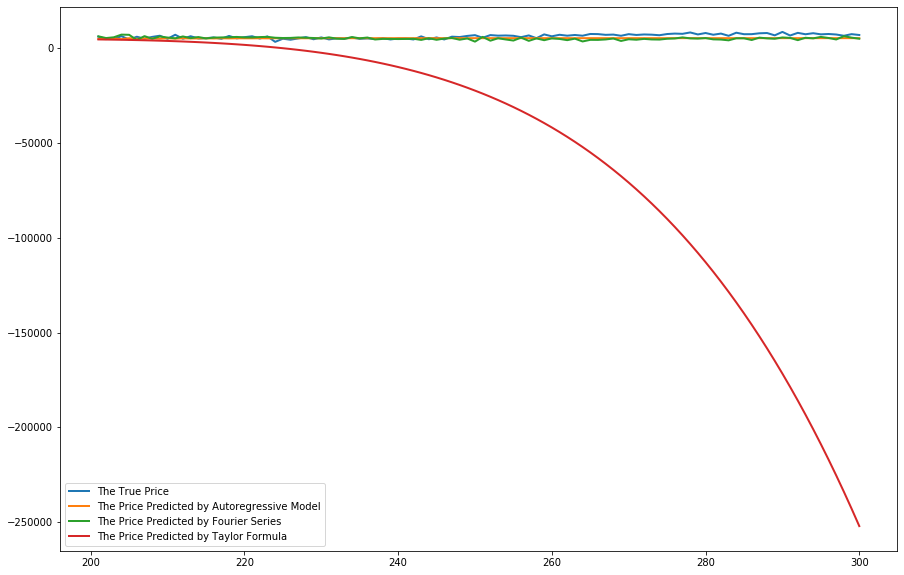

In [148]:
plt.figure(figsize=(15,10))
plt.plot(test_poly["time"], test_poly["price"], linewidth=2, label="The True Price")
plt.plot(test_poly["time"], predictions, linewidth=2, label="The Price Predicted by Autoregressive Model")
plt.plot(test_poly["time"], y_test_pred, linewidth=2, label="The Price Predicted by Fourier Series")
plt.plot(test_poly["time"], price_poly_pred, linewidth=2, label="The Price Predicted by Taylor Formula")
plt.legend(loc="best")
plt.show()